# Customer Churn Analysis Using Python

Source:

- Uqba Ahmad, Customer Churn Analysis Using Python, https://medium.com/the-modern-scientist/customer-churn-analysis-using-python-acd4fd6a1712
- Uqbaahmad / Customer-Churn-Analysis-Prediction, https://github.com/Uqbaahmad/Customer-Churn-Analysis-Prediction/blob/main/Analysis/analysis.ipynb



In [ ]:
!pip install missingno
!pip install cufflinks

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
import plotly.graph_objects as go
import cufflinks as cf

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
# Loading the Dataset
df = pd.read_csv('data/Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.describe()   

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## Data Visualization

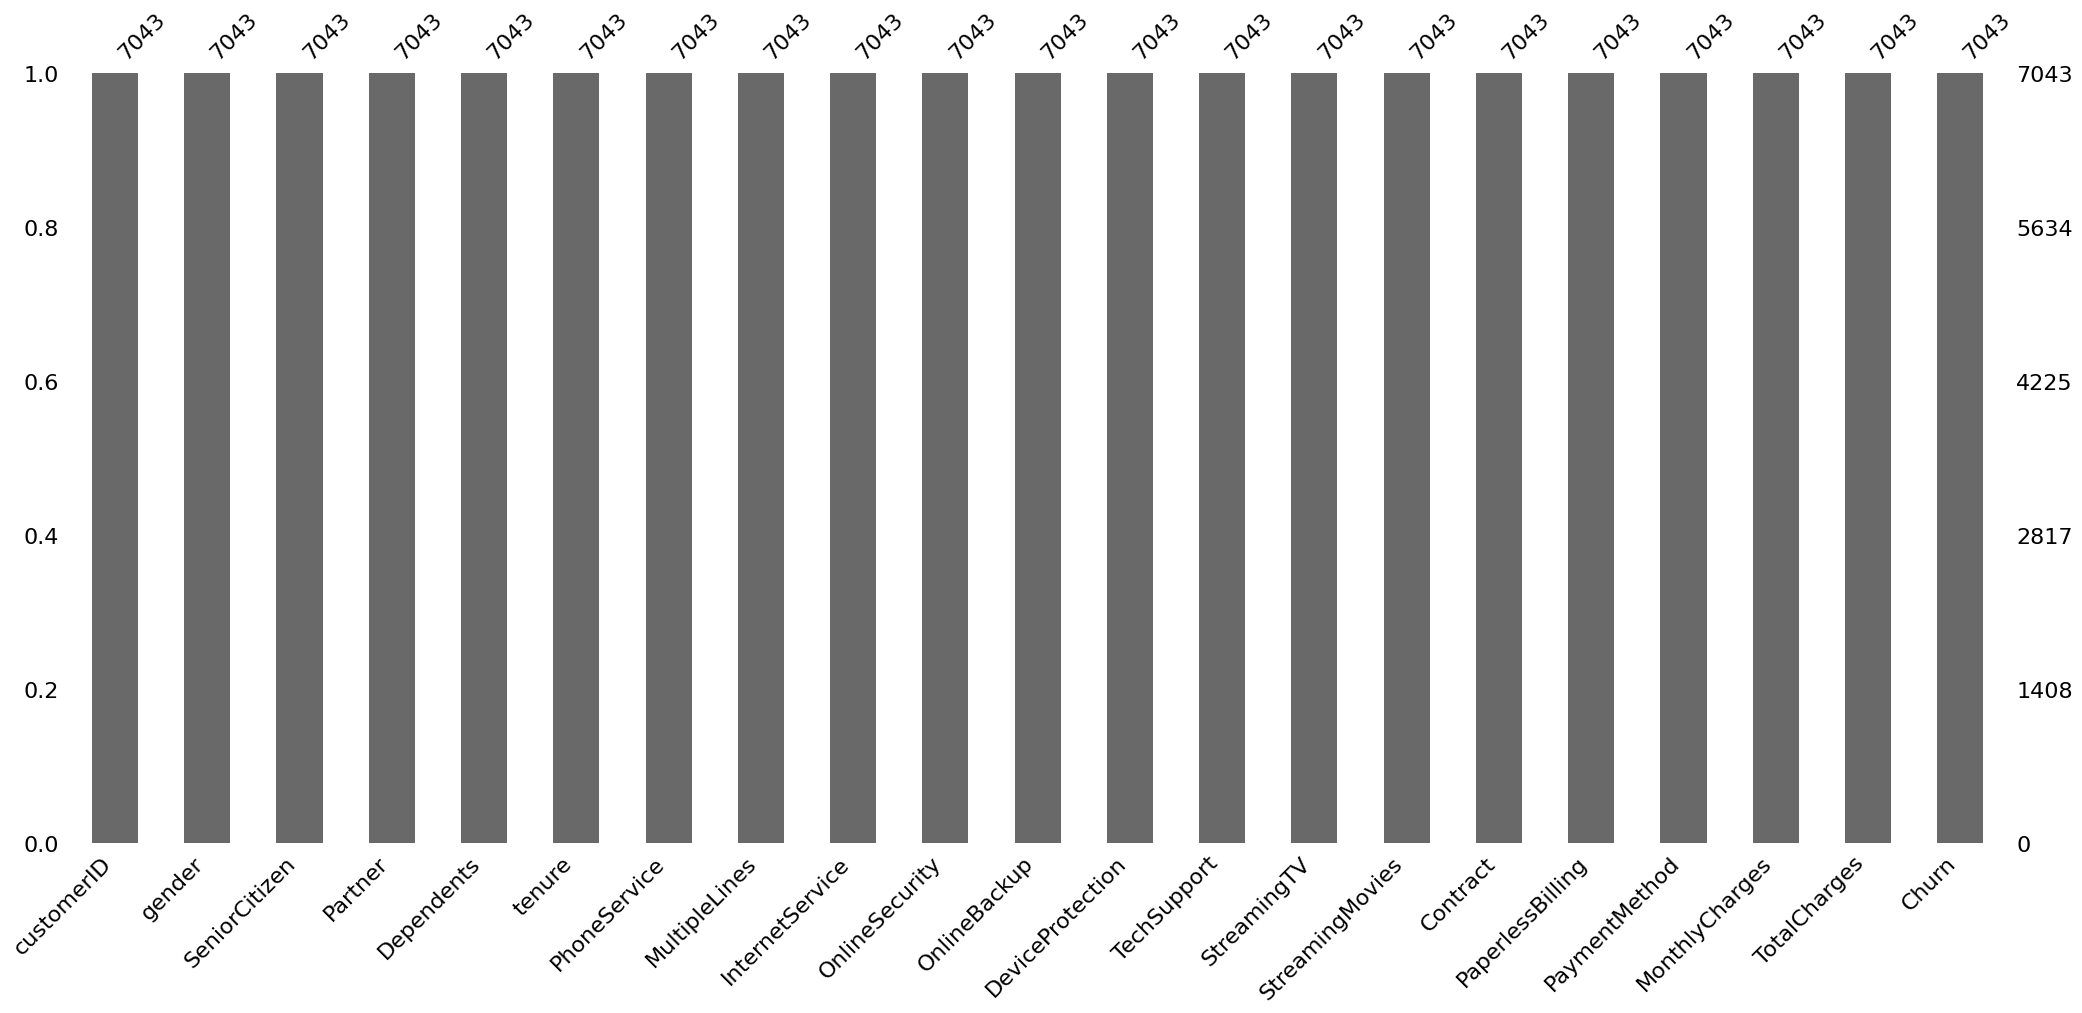

In [7]:
# Visualize missing values as a bar
msno.bar(df)
plt.show()

#### Distribution of churn  

In [8]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

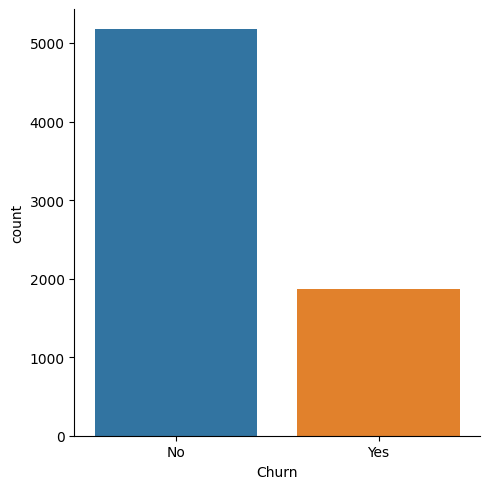

In [9]:
sns.catplot(data=df, x="Churn", kind="count");

#### Distribution of Gender

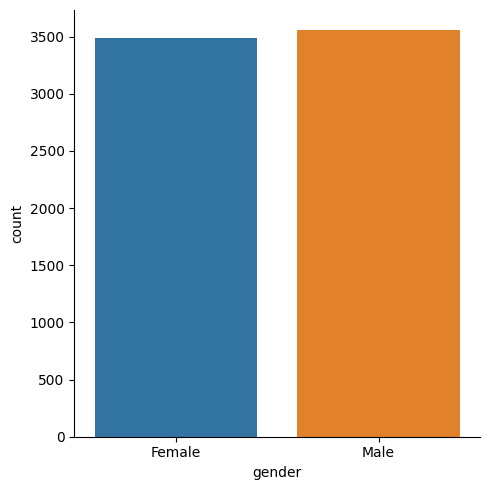

In [10]:
sns.catplot(data=df, x="gender", kind="count");

In [11]:
#Churn yes dataset
churn_yes = pd.DataFrame(df.query('Churn == "Yes"'))

#Churn no dataset
churn_no = pd.DataFrame(df.query('Churn == "No"'))

#### Distribtuion of SeniorCitizen

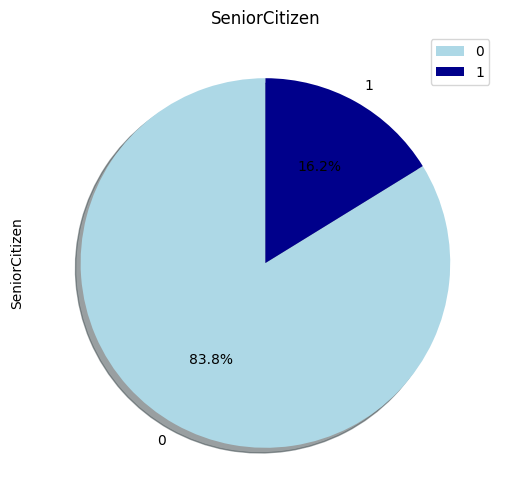

In [12]:
color = ['lightblue', 'darkblue']
df['SeniorCitizen'].value_counts().plot(kind='pie',
                                        colors = color,
                                        figsize=(8,6),
                                        autopct='%1.1f%%',
                                        shadow = True,
                                        startangle=90)
plt.title("SeniorCitizen")
plt.legend()
plt.show()

In [13]:
color= {"Yes": 'blue', "No": 'lightblue'}
fig = px.histogram(df, x="Churn", color="SeniorCitizen", barmode="group", color_discrete_map=color)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.update_layout(title='Chrun distribuiton with SeniorCitizen')
fig.show()

#### Distribution of tenure

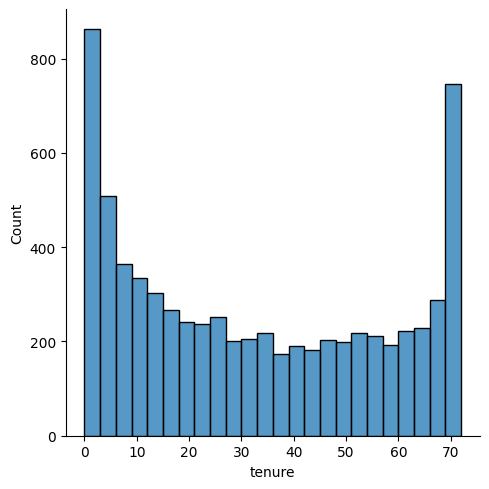

In [14]:
sns.displot(df, x="tenure", binwidth=3);

In [15]:

X = pd.DataFrame(churn_yes['tenure'].value_counts().reset_index())
# Plotting
fig = px.scatter(X, x="tenure",y='index',log_x=True, width=600)
fig.update_layout(title='Tenure')
fig.update_xaxes(title='Days')
fig.update_yaxes(title='Count')
fig.show()

#### Distribution of Internet Service

In [16]:
InternetService=pd.DataFrame(churn_yes['InternetService'].value_counts().reset_index())

InternetService.rename(columns={'index':'InternetService_churn_yes','InternetService':'counts_yes'},inplace=True)

InternetService_no=pd.DataFrame(churn_no['InternetService'].value_counts().reset_index())

InternetService_no.rename(columns={'index':'InternetServicechurn_no','InternetService':'counts_no'},inplace=True)

InternetService_status=pd.concat([InternetService,InternetService_no],axis=1)
InternetService_status

,InternetService_churn_yes,counts_yes,InternetServicechurn_no,counts_no
0,Fiber optic,1297,DSL,1962
1,DSL,459,Fiber optic,1799
2,No,113,No,1413


In [17]:
fig= go.Figure()
#Churn_yes
fig.add_trace(go.Bar(name='Churn Yes',
                     x=['Fiber optic','DSL','No'],
                     y=[1297,459,113],
                     marker_color='blue'))
#Churn_no
fig.add_trace(go.Bar(name='Churn No', 
                     x=['Fiber optic','DSL','No'], 
                     y=[1799,1962,1413], 
                     marker_color='lightblue'))
fig.update_layout(title='InternetService',
                 autosize=False,
                 width=500,
                 height=500)
fig.update_xaxes(title='Different Internet Services')
fig.update_yaxes(title='Counts' )
fig.show()

#### Distribution of PaymentMethod

In [18]:
cf.go_offline()
cf.set_config_file(offline = False, world_readable = True)
df['PaymentMethod'].iplot(kind='hist',
                          xTitle='PaymentMethod',
                          linecolor='black',
                          yTitle='count',
                          dimensions = (600,600),
                          title='Payment Mode Distribution')


#### Distribution of Contracts

In [19]:
cf.go_offline()
cf.set_config_file(offline = False, world_readable = True)
df['Contract'].iplot(kind='hist',
                     xTitle='Contract',
                     linecolor='black',
                     yTitle='count',
                     color='blue',
                     size=20,
                     dimensions=(600,600),
                     title='Payment Mode Distribution')

#### Distribution of Contracts

In [20]:
con=pd.DataFrame(churn_yes['Contract'].value_counts().reset_index())

con.rename(columns={'index':'contracts_churn_yes','Contract':'counts_yes'},inplace=True)

con_no=pd.DataFrame(churn_no['Contract'].value_counts().reset_index())

con_no.rename(columns={'index':'contracts_churn_no','Contract':'counts_no'},inplace=True)

contract_status=pd.concat([con,con_no],axis=1)
contract_status

,contracts_churn_yes,counts_yes,contracts_churn_no,counts_no
0,Month-to-month,1655,Month-to-month,2220
1,One year,166,Two year,1647
2,Two year,48,One year,1307


In [21]:
fig= go.Figure()
#Churn_yes
fig.add_trace(go.Bar(name='Churn Yes',
                     x=['Month-to-month', 'Two year', 'One year'],
                     y=[3875, 1695, 1473],
                     marker_color='blue'))
#Churn_no
fig.add_trace(go.Bar(name='Churn No', 
                     x=['Month-to-month', 'Two year', 'One year'], 
                     y=[2220, 1647, 1307], 
                     marker_color='lightblue'))
fig.update_layout(title='Contract',
                  autosize=False,
                  width=500,
                  height=500)
fig.update_xaxes(title='Different Contract')
fig.update_yaxes(title='Counts')
fig.show()

#### Distribution of PhoneService

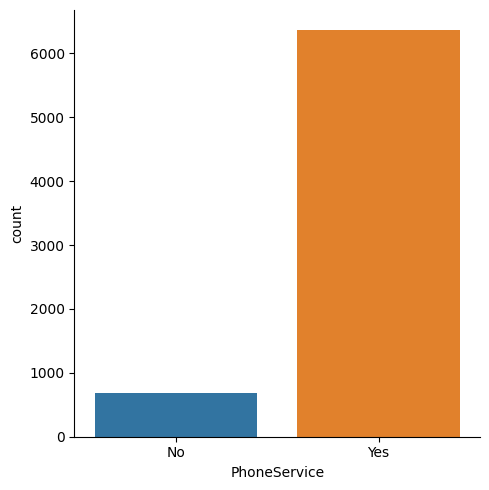

In [22]:
sns.catplot(data=df, x="PhoneService", kind="count");

In [23]:
color = {"Yes": 'blue', "No": 'lightblue'}
fig = px.histogram(df, x="Churn", color="PhoneService", barmode="group", color_discrete_map=color)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.update_layout(title='Chrun distribuiton with Phone Service')
fig.show()